Exercício 1

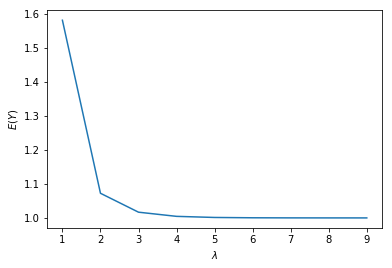

In [20]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np

def func(lst):
  y = []
  for l in lst:
    y.append(l / (l - exp(-l)))

  return y

x = np.arange(1, 10)
y = func(x)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$E(Y)$')

plt.plot(x, y)
plt.show()

Exercício 6

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

In [15]:
# Solução do aluno 1: P (X ≤ 2) = P (Z ≤ (2−10)/ sqrt(9,9)) = 0, 0055
# Esse aluno assumiu que se trata de uma distribuição Normal
# Essa solução está correta, pois o Teorema Central do Limite pode ser usado
# para aproximar a distribuição da média amostral ou, de forma análoga, de X, 
# que neste exercício tem distribuição Binomial (n=1000;p=0,01)
# A aproximação vale quando n tende a infinito, que seria, na prática, n 
# suficientemente grande. Resta saber se 1000 é suficientemente grande
# para que a aproximação de uma Binomial (1000;0,01) pela Normal(10;9,9)
# seja adequada.

Probabilidade de P(Z <= -2,54) = P (X <= -2): 0.0055
Probabilidade de P (X <= -2): 0.0055


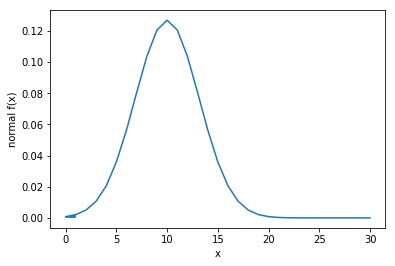

In [28]:
zi = (2 - 10) / sqrt(9.9) # valor de interesse na variável ZÑ(0,1): aqui, transformei X em Z
prob = stats.norm.cdf(zi)
print('Probabilidade de P(Z <= -2,54) = P (X <= -2): %.4f' % prob)

prob2 = stats.norm.cdf(2, 10, math.sqrt(9.9))         # Aqui, calculei a prob usando a variável X diretamente
print('Probabilidade de P (X <= -2): %.4f' % prob2) # repare que ambas as prob são iguais


x = np.arange(0, 30 + 1)
pdf = stats.norm.pdf(x, 10, math.sqrt(9.9))
i = int(30 * (2 - (0)) / (30 - (0))) # encontra índice com valor mais próximo de 2

plt.plot(x, pdf)
plt.fill_between(x[:i], pdf[:i], 0)
plt.xlabel('x')
plt.ylabel('normal f(x)')

plt.show()

<hr>

In [22]:
# Solução do aluno 2: P (X ≤ 2) = 0,99^1000 + 1000 * 0,01 * 0,99^999 + 499500 * 0,01^2 * 0,99^998 = 0,0027
# Esse aluno assumiu que se trata de uma distribuição Binomial (n=1000;p=0,01)
# Isso está correto, pois esta é extamente a distribuição de X.

Probabilidade de P (X <= 2): 0.0027


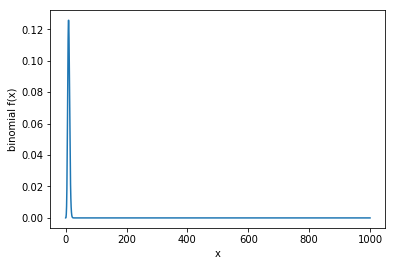

In [29]:
k = 2
n = 1000
p = .01

prob = stats.binom.cdf(k, n, p)
print('Probabilidade de P (X <= 2): %.4f' % prob)

x = np.arange(0, 1000 + 1) # gera a curva no intervalo [0, 1000], que é o intervalo completo de X
pdf = stats.binom.pmf(x, n, p)

plt.plot(x, pdf)
plt.fill_between(x[:k + 1], pdf[:k + 1], 0)
plt.xlabel('x')
plt.ylabel('binomial f(x)')
plt.show()

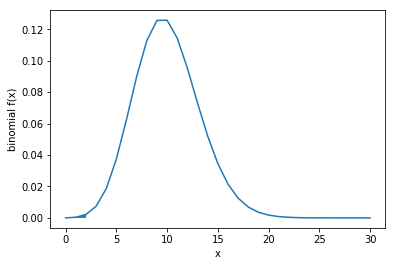

In [31]:
# como p é muito baixo a curva fica bem deslocada à esquerda

x = np.arange(0, 30 + 1) # gera a curva no intervalo [0, 30], que é o bastante para observarmos o pico.
pdf = stats.binom.pmf(x, n, p)

plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('binomial f(x)')
plt.fill_between(x[:k + 1], pdf[:k + 1], 0)
plt.show()

<hr>

In [20]:
# Solução do aluno 3: P (X ≤ 2) = e^−10 * (1 + 10 + 50) = 0,0028
# Esse aluno assumiu que se trata de uma distribuição de Poisson
# Os números 1, 10, 50 correspondem aos fatores lambda^x / x! ---> (10^0 / 0!) , (10^1 / 1!), (10^2 / 2!)
# Essa solução está correta também, pois quando n é grande e p é pequeno,
# a distribuição a distribuição Binomial pode ser aproximada pela Poisson de média np
# Resta saber se 1000 é suficientemente grande e 0,01 é suficientemente pequeno
# para que a aproximação de uma Binomial (1000;0,01) pela Poisson(10)
# seja adequada.

Probabilidade de P (X <= 2): 0.0028


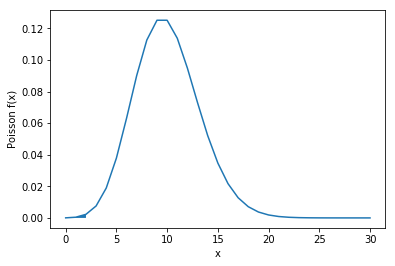

In [32]:
k = 2
_lambda = 10

prob = stats.poisson.cdf(k, _lambda)
print('Probabilidade de P (X <= 2): %.4f' % prob)

x = np.arange(0, 30 + 1) # gera a curva no intervalo [0, 10], que é o bastante.
# (Lembre que Poisson é definida de 0 a +infinito)
pdf = stats.poisson.pmf(x, _lambda)

plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Poisson f(x)')
plt.fill_between(x[:k + 1], pdf[:k + 1], 0)
plt.show()

<hr>

In [35]:
# Comparando as três distribuições para valores diferentes de n e p na dist. Binomial

def plot_distributions(n, p):
    # Normal
    x = np.arange(0, 30 + 1)
    pdf = stats.norm.pdf(x, 10, sqrt(9.9))
    i = int(30 * (2 - (0)) / (30 - (0))) # encontra índice com valor mais próximo de 2
    plt.plot(x, pdf, label = 'Normal')
    plt.fill_between(x[:i], pdf[:i], 0, alpha = .5)

    # Binomial
    k = 2
    # n = 1000
    # p = .01
    x = np.arange(0, 30 + 1)
    pdf = stats.binom.pmf(x, n, p)
    plt.plot(x, pdf, label = 'Binomial')
    plt.fill_between(x[:k + 1], pdf[:k + 1], 0, alpha = .5)


    # Poisson
    k = 2
    _lambda = 10
    x = np.arange(0, 30 + 1)
    pdf = stats.poisson.pmf(x, _lambda)
    plt.plot(x, pdf, label = 'Poisson')
    plt.fill_between(x[:k + 1], pdf[:k + 1], 0, alpha = .5)
    
    plt.title('n = %d, p = %.3f' % (n, p))
    plt.legend()

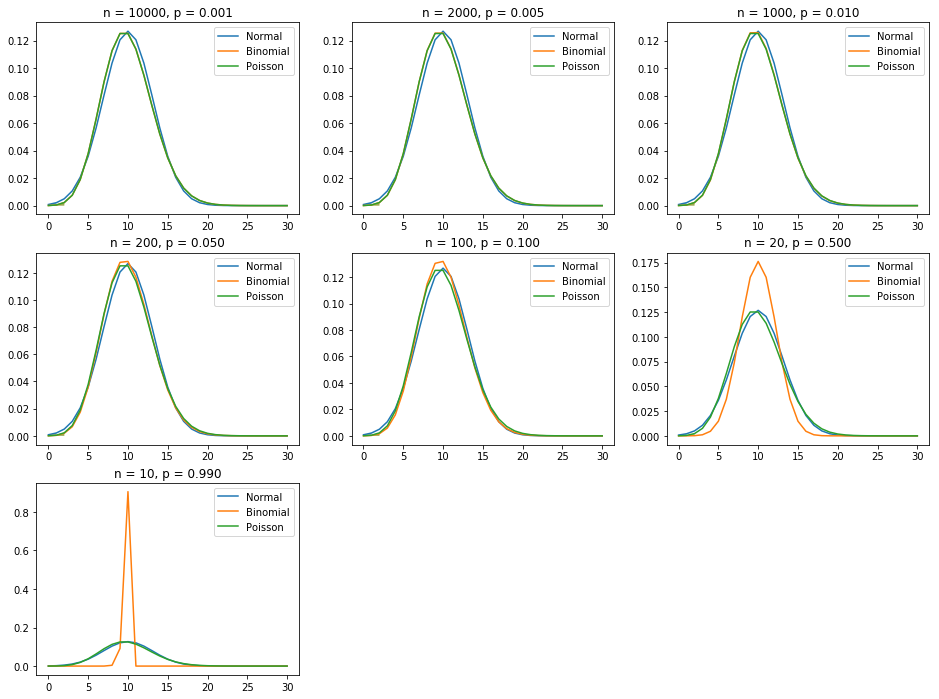

In [38]:
plt.figure(figsize = (16, 12))
n_list = [10000, 2000, 1000, 200, 100, 20, 10]
p_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, .99]
subp = 1
for n, p in zip(n_list, p_list):
    plt.subplot(3, 3, subp)
    plot_distributions(n, p)
    subp += 1

plt.show()